# CREDIT LOAN APPLICATION ANALYSIS

### Exploratory data analysis

Loading of the necessary libraries

In [138]:
import pandas as pd
import numpy as np
import os 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ydata_profiling
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr


In [60]:
import openml

dataset = openml.datasets.get_dataset('credit-g')

df, y, _, _ = dataset.get_data(dataset_format="dataframe")


In [61]:
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   uint8   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   uint8   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   uint8   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   uint8   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [63]:
df.shape

(1000, 21)

The datasets contains 1000 observations and 21 features.

In [64]:
target_var = "class"

df[target_var].value_counts()

good    700
bad     300
Name: class, dtype: int64

Lets first check the missing values and the potentials duplicates observations

In [65]:
df.drop_duplicates()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857.0,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804.0,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845.0,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


There's no duplicate data!

In [66]:
#Missing values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

No missing values in the dataset!

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>,
        <Axes: title={'center': 'installment_commitment'}>],
       [<Axes: title={'center': 'residence_since'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'existing_credits'}>],
       [<Axes: title={'center': 'num_dependents'}>, <Axes: >, <Axes: >]],
      dtype=object)

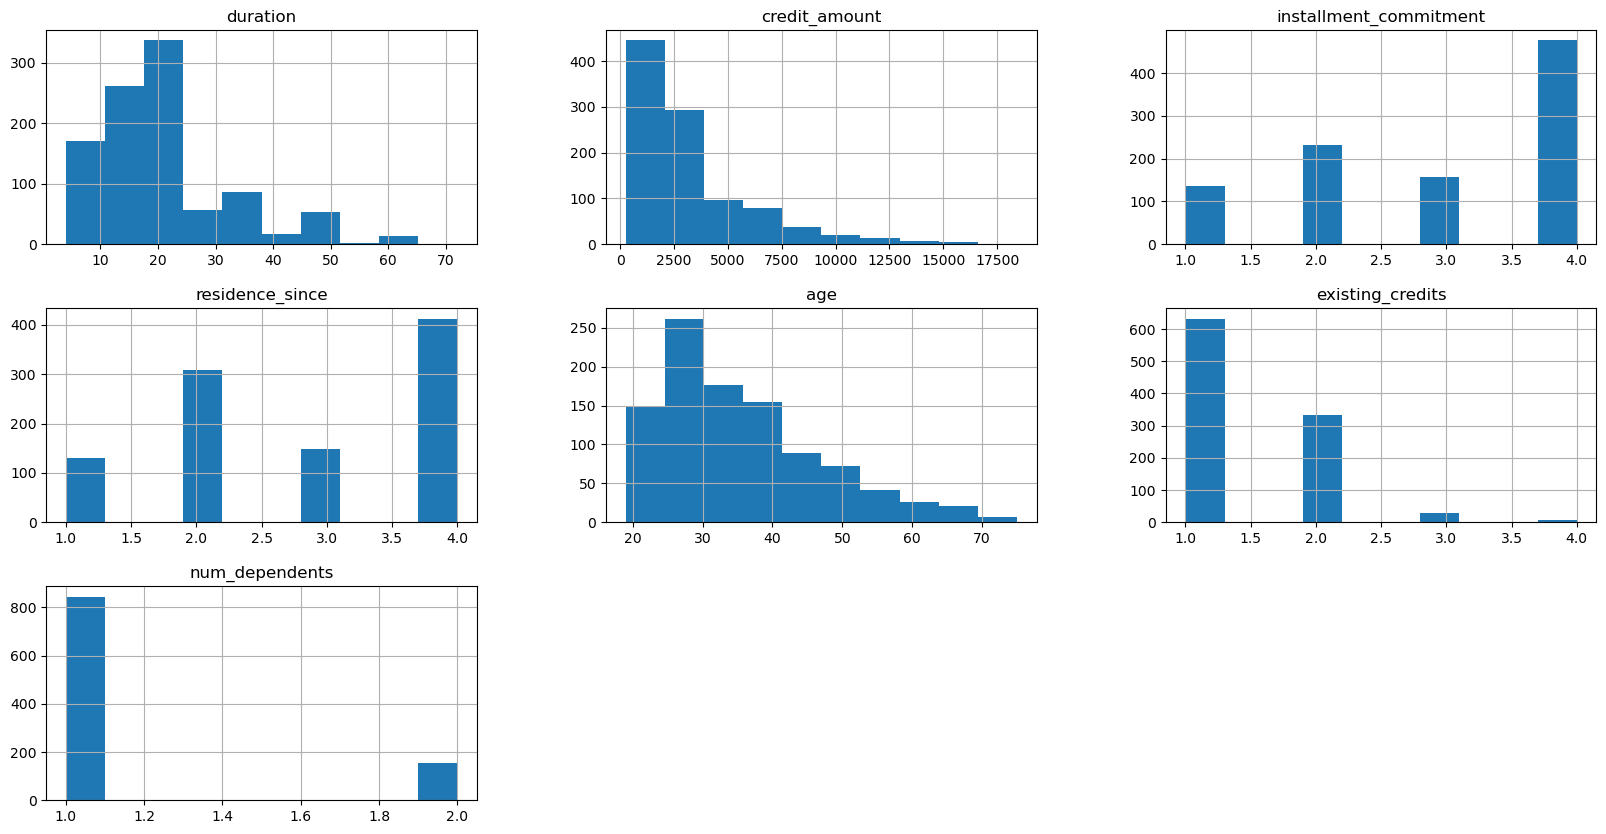

In [68]:
# Distribution of the variables

df.hist(figsize=(20, 10))

From the above plots, we can comments that:
- Duration : Most of the loan applications are for less than 30 months ;
- Much of te amount requested is less than 7500 ;
- The vastmajority of appliants are between 20 and 50 years old ;
- The applicants have at least one existing loan ongoing.

Let's crosstab the target variable with the covariates to see how it behaves depending on the values of each covariates

Let's profile the data using `ydata`

In [70]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [81]:
categorical_cols = df.select_dtypes(include=['category']).columns

numerical_cols = df.select_dtypes(include=['float64', 'uint8']).columns

print(numerical_cols)

print(categorical_cols)

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')
Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [101]:
for cols in categorical_cols:
    cross_tab = pd.crosstab(index=df['class'], columns=df[cols])
    
    print(f"\n Crosstab between 'class' and '{cols}' : \n")
    print(cross_tab)
    chi2, p, _, _ = chi2_contingency(cross_tab)
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    alpha = 0.05
    min_dim = min(cross_tab.shape)

    # Cramér's V
    cramers_v = np.sqrt(chi2 / (df.shape[0] * (min_dim - 1)))
    
    if p < alpha:
        print(f"The result is statistically significant : There's an association between 'class' and '{cols}' ")
        print(f"Cramér's V: {cramers_v}")
    else:
        pass



 Crosstab between 'class' and 'checking_status' : 

checking_status   <0  0<=X<200  >=200  no checking
class                                             
good             139       164     49          348
bad              135       105     14           46
Chi-square statistic: 123.7209435162656
P-value: 1.2189020722893755e-26
The result is statistically significant : There's an association between 'class' and 'checking_status' 
Cramér's V: 0.35173988047457116

 Crosstab between 'class' and 'credit_history' : 

credit_history  no credits/all paid  all paid  existing paid  \
class                                                          
good                             15        21            361   
bad                              25        28            169   

credit_history  delayed previously  critical/other existing credit  
class                                                               
good                            60                             243  
bad                

Comments :
- Checking status has a somewhat moderate association with our target variable ;
- Credit history, Purpose, saving status, employment, property magnitude, other payment plans, housing  have a weak association with our target ;
- Personal status, other parties,foreigner worker have somewhat no association with the target variable even if we have a significance of the chisquare test.
The other variables(own telephone, job) are not significant at 5%. Maybe regrouping modalities or other feature engineering would help get the most out of those variables ; Since it seems natural to think that the type of job/qualification is likely to discriminate between potential good/bad client for the bank.

In [103]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In average, loan requsted are for a period of 21 months, with an avererage amount of 3270. Loan applicants are in average 35 years old so they're young.

<Axes: xlabel='class', ylabel='age'>

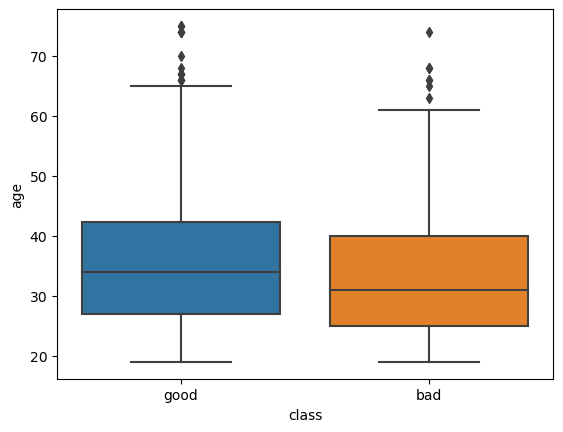

In [129]:
sns.boxplot(x='class', y='age', data=df)


<Axes: xlabel='class', ylabel='duration'>

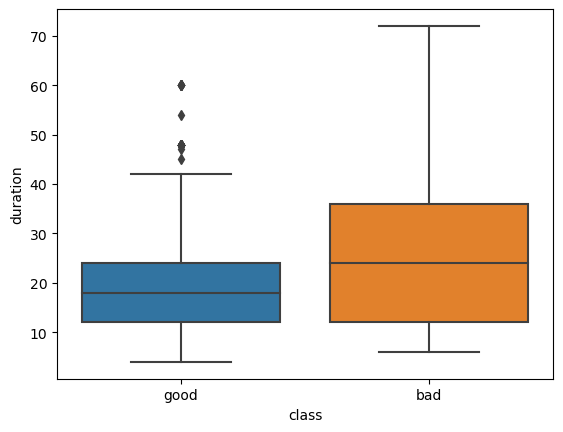

In [127]:

sns.boxplot(x='class', y='duration', data=df)

<Axes: xlabel='class', ylabel='credit_amount'>

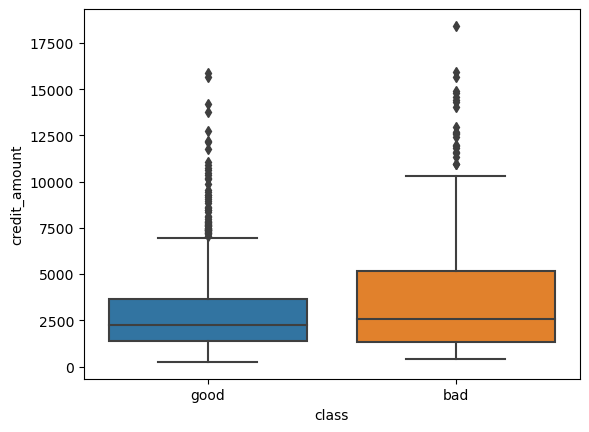

In [130]:
# df.hist(figsize=(20, 10))

sns.boxplot(x='class', y='credit_amount', data=df)


In [150]:
num_cols_corr_mat = df[numerical_cols].corr()

p_values = df[numerical_cols].apply(lambda x: df[numerical_cols].apply(lambda y: pearsonr(x, y)[1]))

correlation_table = pd.DataFrame(index=df[numerical_cols].columns, columns=df[numerical_cols].columns)
for i in df[numerical_cols].columns:
    for j in df[numerical_cols].columns:
        correlation_table.loc[i, j] = f"{num_cols_corr_mat.loc[i, j]:.2f} ({p_values.loc[i, j]:.3f})"

# Display the correlation table
print(correlation_table)


                             duration  credit_amount installment_commitment  \
duration                 1.00 (0.000)   0.62 (0.000)           0.07 (0.018)   
credit_amount            0.62 (0.000)   1.00 (0.000)          -0.27 (0.000)   
installment_commitment   0.07 (0.018)  -0.27 (0.000)           1.00 (0.000)   
residence_since          0.03 (0.282)   0.03 (0.361)           0.05 (0.119)   
age                     -0.04 (0.254)   0.03 (0.301)           0.06 (0.066)   
existing_credits        -0.01 (0.722)   0.02 (0.511)           0.02 (0.494)   
num_dependents          -0.02 (0.452)   0.02 (0.588)          -0.07 (0.024)   

                       residence_since            age existing_credits  \
duration                  0.03 (0.282)  -0.04 (0.254)    -0.01 (0.722)   
credit_amount             0.03 (0.361)   0.03 (0.301)     0.02 (0.511)   
installment_commitment    0.05 (0.119)   0.06 (0.066)     0.02 (0.494)   
residence_since           1.00 (0.000)   0.27 (0.000)     0.09 (0.005) 

<Axes: >

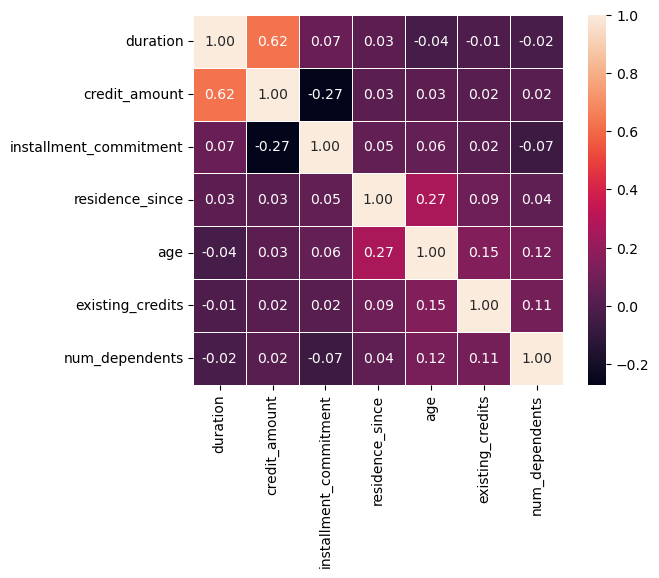

In [153]:
sns.heatmap(data=df[numerical_cols].corr(), annot=True, linewidths=.4, fmt='.2f', square=True)


- Hence, duration and credit amount are strongly linearly correlated and we might need later on to remove one of them.

### Feature Engineering

In [156]:
#

#### Modeling

We are going to build some pipelines and start with a baseline model that we'll finetune along the way. We will start with a Logit model.

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

In [172]:
target = df[target_var]

data = df.drop(columns=[target_var])


In [173]:
print(f"The data contains {data.shape[0]} samples and {data.shape[1]} features.")

The data contains 1000 samples and 20 features.


In [176]:
data.dtypes

checking_status           category
duration                     uint8
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment       uint8
personal_status           category
other_parties             category
residence_since              uint8
property_magnitude        category
age                          uint8
other_payment_plans       category
housing                   category
existing_credits             uint8
job                       category
num_dependents               uint8
own_telephone             category
foreign_worker            category
dtype: object

In [177]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [226]:
one_hot_encoding_cols = categorical_cols.drop('class')

standard_scal_cols = numerical_cols

preprocessor = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), one_hot_encoding_cols),
    ('StandardScaler', StandardScaler(), standard_scal_cols)
])
C = .1 #Our hyperparameter for the logistic regressor ; It'sthe strenght f the penalty
model_log_1 = make_pipeline(preprocessor, LogisticRegression(C=C, solver='lbfgs', max_iter=1000))


In [227]:
model_log_1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object')),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000))])

In [228]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2408)

print(f"The data contains {X_train.shape[0]} samples and {X_train.shape[1]} features.")
print(f"The data contains {X_test.shape[0]} samples and {X_test.shape[1]} features.")

The data contains 800 samples and 20 features.
The data contains 200 samples and 20 features.


In [229]:
start = time.time()
model_log_1.fit(X_train, y_train)
elapsed_time = time.time() - start


In [230]:
print(f"The accuracy score using {model_log_1[-1].__class__.__name__} is {model_log_1.score(X_test, y_test):.3f}")


The accuracy score using LogisticRegression is 0.800


In [231]:
scores = cross_val_score(model_log_1, X_train, y_train, cv=5)

print(f"The scores output after the CV are :\n{scores}")

print(f"The mean accuracy score is :{scores.mean():.3f} +/- {scores.std():.2f}")


The scores output after the CV are :
[0.76875 0.7125  0.7625  0.7875  0.74375]
The mean accuracy score is :0.755 +/- 0.03


Hyperparameter tuning for our baseline logistic model

In [232]:
print("The parameters of the full pipeline are :")
for params in model_log_1.get_params().keys():
    print(params)

The parameters of the full pipeline are :
memory
steps
verbose
columntransformer
logisticregression
columntransformer__n_jobs
columntransformer__remainder
columntransformer__sparse_threshold
columntransformer__transformer_weights
columntransformer__transformers
columntransformer__verbose
columntransformer__verbose_feature_names_out
columntransformer__OneHotEncoder
columntransformer__StandardScaler
columntransformer__OneHotEncoder__categories
columntransformer__OneHotEncoder__drop
columntransformer__OneHotEncoder__dtype
columntransformer__OneHotEncoder__feature_name_combiner
columntransformer__OneHotEncoder__handle_unknown
columntransformer__OneHotEncoder__max_categories
columntransformer__OneHotEncoder__min_frequency
columntransformer__OneHotEncoder__sparse
columntransformer__OneHotEncoder__sparse_output
columntransformer__StandardScaler__copy
columntransformer__StandardScaler__with_mean
columntransformer__StandardScaler__with_std
logisticregression__C
logisticregression__class_weight


We are interested in the `logisticregression_C`

In [235]:
params_grid = {'logisticregression__C':(.001, .01, .05, .06, .07, .08, .09, .1, .2, .5, .8, 1, 5, 8, 10)} #A wide range of hyp params, we could've used a randomizedSearch
model_grid_search = GridSearchCV(model_log_1, param_grid=params_grid, n_jobs=-1, cv=5)
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start

print(
    f"The accuracy score using the {model_grid_search.__class__.__name__} is :{model_grid_search.score(X_test, y_test):.2f} in {elapsed_time}"
)

print(f"The {model_grid_search.__class__.__name__} model best param is: {model_grid_search.best_params_}")

The accuracy score using the GridSearchCV is :0.79 in 1.911724328994751
The GridSearchCV model best param is: {'logisticregression__C': 0.5}
